# Data Cleaning Example

We will load data from the NASDAQ discrete on open, on close, and intraday auctions.  The data is provided on the following site:

http://www.nasdaqtrader.com/Trader.aspx?id=OpenClose

We will look at the data from January 2, 2015 and do the following:

## Load & Inspect
1. load the data  
2. Inspect the data

## Identify Issues
1. List issues

## Fix Issues
1. Use read_csv to fix issues upon loading
2. Ensure the date format is properly applied as a ```date``` type

## Inspect 
1. Identify the top 10 highest volume auction symbols for that day (both at the open and at the close)   
2. Count how many symbols cross less than 1000 shares at the open
3. Count how many symbols cross less than 1000 shares at the close


## Pie Chart

1. Produce a Pie chart of the relative **volume** of the opening vs closing cross
2. Produce a Pie chart of the relative **symbol count** of the opening vs closing cross

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 4]

In [2]:
location = '../../data/'
files = os.listdir(location)
files

['responses.csv',
 'CrossStats20150102.txt',
 'multiple_choice.csv',
 'iris_names.txt',
 'state_codes.csv',
 'iris.csv',
 'nst-est2019-popchg2010-2019.pdf',
 'questions.csv',
 'mount_rainier_daily.csv',
 'COVID_by_State.csv',
 'Candidate Assessment.xlsx',
 'nst-est2019-popchg2010_2019.csv']

## Load & Inspect the Data

In [3]:
df = pd.read_csv(location + 'CrossStats20150102.txt')

In [4]:
df.head()

,Date,Symbol,ListingMarket,OpeningCross,ClosingCross,IntradayCross,Unnamed: 6
0,----------,------,-------------,------------,------------,-------------,NaN
1,01/02/2015,AAL,,169168,338447,0,NaN
2,01/02/2015,AAME,,200,0,0,NaN
3,01/02/2015,AAOI,,508,35903,0,NaN
4,01/02/2015,AAON,,767,6205,0,NaN


### Let's Examine The Data

The ```describe``` function will give us an idea of the data distribution for numerical fields.

In [5]:
df.describe()

,Unnamed: 6
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


Oops. The data is not even numerical.  What datatypes do we have?

In [6]:
df.dtypes

Date              object
Symbol            object
ListingMarket     object
OpeningCross      object
ClosingCross      object
IntradayCross     object
Unnamed: 6       float64
dtype: object

In [7]:
df.columns

Index(['Date      ', 'Symbol', 'ListingMarket', 'OpeningCross', 'ClosingCross',
       'IntradayCross', 'Unnamed: 6'],
      dtype='object')

## Identify Issues

Issues:

1. row 0 is a seperator
2. empty column called Unamed: 6
3. only one column is recognized as a numerical type
4. Padded spaces in header  
5. Date is not in appropriate format

## Fix Issues

### Use ```read_csv``` to Clean Some Issues

### Datetime Fields

Use the date parser to transform dates into valide datetime objects.

In [8]:
from datetime import datetime
dateparse = lambda x: datetime.strptime(x, '%m/%d/%Y')

In [9]:
df = pd.read_csv(location + 'CrossStats20150102.txt',skiprows=[1],
                 parse_dates=['Date      '],date_parser=dateparse)
df.head()

,Date,Symbol,ListingMarket,OpeningCross,ClosingCross,IntradayCross,Unnamed: 6
0,2015-01-02,AAL,,169168,338447,0,NaN
1,2015-01-02,AAME,,200,0,0,NaN
2,2015-01-02,AAOI,,508,35903,0,NaN
3,2015-01-02,AAON,,767,6205,0,NaN
4,2015-01-02,AAP,,2,0,0,NaN


In [10]:
df.dtypes

Date             datetime64[ns]
Symbol                   object
ListingMarket            object
OpeningCross              int64
ClosingCross              int64
IntradayCross             int64
Unnamed: 6              float64
dtype: object

In [11]:
df.columns

Index(['Date      ', 'Symbol', 'ListingMarket', 'OpeningCross', 'ClosingCross',
       'IntradayCross', 'Unnamed: 6'],
      dtype='object')

### Fix Padding with Spaces

In [12]:
cc = []
for c in df.columns:
    cc += [c.strip()]
cc

['Date',
 'Symbol',
 'ListingMarket',
 'OpeningCross',
 'ClosingCross',
 'IntradayCross',
 'Unnamed: 6']

In [13]:
df.columns = cc

### Listing Market Is Empty

In [14]:
df.ListingMarket.unique()

array(['             ', 'NULL         '], dtype=object)

### Remove Empty Columns

Listing Market and Unamed: 6

In [15]:
df = df[['Date', 'Symbol',  'OpeningCross', 'ClosingCross','IntradayCross']]

In [16]:
df.head()

,Date,Symbol,OpeningCross,ClosingCross,IntradayCross
0,2015-01-02,AAL,169168,338447,0
1,2015-01-02,AAME,200,0,0
2,2015-01-02,AAOI,508,35903,0
3,2015-01-02,AAON,767,6205,0
4,2015-01-02,AAP,2,0,0


### Inspect Data

In [17]:
df.describe()

,OpeningCross,ClosingCross,IntradayCross
count,2.745000e+03,2.745000e+03,2745.0
mean,1.377668e+04,4.286665e+04,0.0
std,3.621713e+05,1.127405e+06,0.0
min,0.000000e+00,0.000000e+00,0.0
25%,2.100000e+02,2.000000e+02,0.0
50%,9.990000e+02,3.409000e+03,0.0
75%,3.944000e+03,1.361900e+04,0.0
max,1.890849e+07,5.883448e+07,0.0


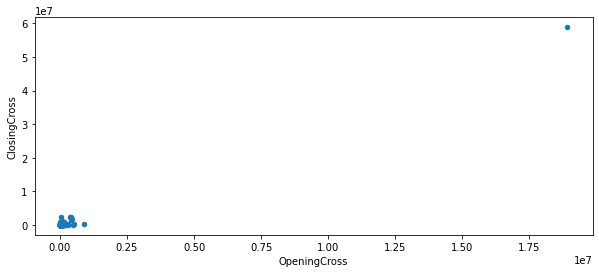

In [18]:
df.plot.scatter(x='OpeningCross',y='ClosingCross')
plt.show()

In [19]:
df['log_open'] = np.log10(df['OpeningCross'])
df['log_close'] = np.log10(df['ClosingCross'])

/Users/dan/Library/Python/3.8/lib/python/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


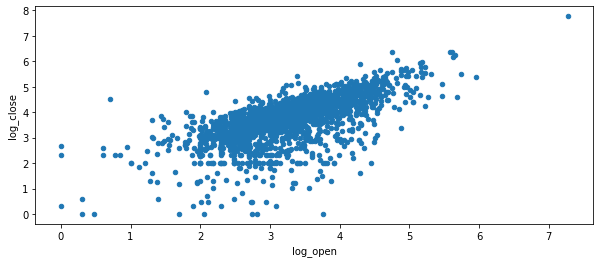

In [20]:
df.plot.scatter(x='log_open',y='log_close')
plt.show()

In [21]:
df['Symbol'].values

array(['AAL   ', 'AAME  ', 'AAOI  ', ..., 'ZU    ', 'ZUMZ  ', 'TOTAL '],
      dtype=object)

### Symbols are Space Padded

In [22]:
df['Symbol'] = df.apply(lambda x: x['Symbol'].strip(), axis=1)

In [23]:
df['Symbol'].values

array(['AAL', 'AAME', 'AAOI', ..., 'ZU', 'ZUMZ', 'TOTAL'], dtype=object)

In [24]:
df.head()

,Date,Symbol,OpeningCross,ClosingCross,IntradayCross,log_open,log_close
0,2015-01-02,AAL,169168,338447,0,5.228318,5.529491
1,2015-01-02,AAME,200,0,0,2.301030,-inf
2,2015-01-02,AAOI,508,35903,0,2.705864,4.555131
3,2015-01-02,AAON,767,6205,0,2.884795,3.792742
4,2015-01-02,AAP,2,0,0,0.301030,-inf


## Inspect

### Top 10 Largest Auctions

In [25]:
df.sort_values('ClosingCross',ascending=False).head(10)

,Date,Symbol,OpeningCross,ClosingCross,IntradayCross,log_open,log_close
2744,2015-01-02,TOTAL,18908494,58834476,0,7.276657,7.769632
5,2015-01-02,AAPL,410806,2370515,0,5.613637,6.374843
2030,2015-01-02,QRVO,57042,2299961,0,4.756195,6.361720
1624,2015-01-02,MSFT,378640,2292561,0,5.578226,6.360321
1278,2015-01-02,INTC,455743,1759292,0,5.658720,6.245338
621,2015-01-02,CSCO,424553,1518028,0,5.627932,6.181280
769,2015-01-02,EBAY,66307,1119755,0,4.821559,6.049123
1039,2015-01-02,GILD,149791,962942,0,5.175486,5.983600
532,2015-01-02,CMCSA,142369,829381,0,5.153415,5.918754
2700,2015-01-02,XIV,19802,784614,0,4.296709,5.894656


### Another Issue

Total Should be removed

In [26]:
df.tail()

,Date,Symbol,OpeningCross,ClosingCross,IntradayCross,log_open,log_close
2740,2015-01-02,ZOES,200,0,0,2.301030,-inf
2741,2015-01-02,ZSPH,634,14718,0,2.802089,4.167849
2742,2015-01-02,ZU,1971,17295,0,3.294687,4.237921
2743,2015-01-02,ZUMZ,1745,8763,0,3.241795,3.942653
2744,2015-01-02,TOTAL,18908494,58834476,0,7.276657,7.769632


In [27]:
df = df.drop(2744)

In [28]:
df.tail()

,Date,Symbol,OpeningCross,ClosingCross,IntradayCross,log_open,log_close
2739,2015-01-02,ZNGA,76950,282742,0,4.886209,5.451390
2740,2015-01-02,ZOES,200,0,0,2.301030,-inf
2741,2015-01-02,ZSPH,634,14718,0,2.802089,4.167849
2742,2015-01-02,ZU,1971,17295,0,3.294687,4.237921
2743,2015-01-02,ZUMZ,1745,8763,0,3.241795,3.942653


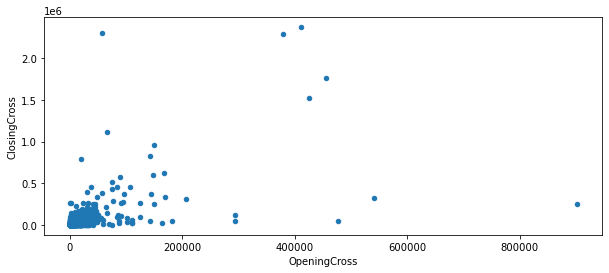

In [29]:
df.plot.scatter(x='OpeningCross',y='ClosingCross')
plt.show()

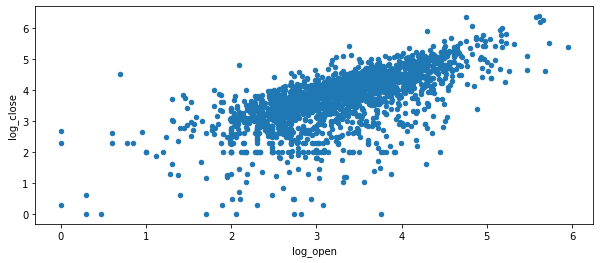

In [30]:
df.plot.scatter(x='log_open',y='log_close')
plt.show()

## Top 10 Closing Cross

In [31]:
df.sort_values('ClosingCross',ascending=False).head(10)

,Date,Symbol,OpeningCross,ClosingCross,IntradayCross,log_open,log_close
5,2015-01-02,AAPL,410806,2370515,0,5.613637,6.374843
2030,2015-01-02,QRVO,57042,2299961,0,4.756195,6.361720
1624,2015-01-02,MSFT,378640,2292561,0,5.578226,6.360321
1278,2015-01-02,INTC,455743,1759292,0,5.658720,6.245338
621,2015-01-02,CSCO,424553,1518028,0,5.627932,6.181280
769,2015-01-02,EBAY,66307,1119755,0,4.821559,6.049123
1039,2015-01-02,GILD,149791,962942,0,5.175486,5.983600
532,2015-01-02,CMCSA,142369,829381,0,5.153415,5.918754
2700,2015-01-02,XIV,19802,784614,0,4.296709,5.894656
1636,2015-01-02,MU,167742,620791,0,5.224642,5.792945


## Top 10 Opening Cross

In [32]:
df.sort_values('OpeningCross',ascending=False).head(10)

,Date,Symbol,OpeningCross,ClosingCross,IntradayCross,log_open,log_close
2639,2015-01-02,WBA,901181,246627,0,5.954812,5.392041
2223,2015-01-02,SIRI,540959,327822,0,5.733164,5.515638
1251,2015-01-02,ILMN,476664,41021,0,5.678212,4.613006
1278,2015-01-02,INTC,455743,1759292,0,5.658720,6.245338
621,2015-01-02,CSCO,424553,1518028,0,5.627932,6.181280
5,2015-01-02,AAPL,410806,2370515,0,5.613637,6.374843
1624,2015-01-02,MSFT,378640,2292561,0,5.578226,6.360321
2479,2015-01-02,TVIX,294440,44552,0,5.468997,4.648867
2338,2015-01-02,STX,293080,124208,0,5.466986,5.094150
2025,2015-01-02,QQQ,206471,306782,0,5.314859,5.486830


## How Many Small Market Opens

In [33]:
small_open = df[df['OpeningCross'] < 1000]
len(small_open)

1373

In [34]:
len(small_open) / len(df)

0.5003644314868805

## How Many Small Market Closes

In [35]:
small_close = df[df['ClosingCross'] < 1000]
len(small_close)

964

In [36]:
len(small_close) / len(df)

0.35131195335276966

## Pie Chart

1. Produce a Pie chart of the relative **volume** of the opening vs closing cross
2. Produce a Pie chart of the relative **symbol count** of the opening vs closing cross

In [37]:
import plotly.express as px

In [68]:
total = df.sum()
total = total[['OpeningCross', 'ClosingCross']]
total.values

array([18908494, 58834476], dtype=object)

In [69]:
fig = px.pie(total, names=['Open', 'Close'],values=total.values,
            title='NASDAQ Cross Volume<br>Open vs Close')
fig.show()

In [72]:
df['count_open'] = (df['OpeningCross'] > 0).astype(int)
df['count_close'] = (df['ClosingCross'] > 0).astype(int)
df.sum()

Symbol           AALAAMEAAOIAAONAAPAAPLAAUAAVLAAWWAAXJABACABAXA...
OpeningCross                                              18908494
ClosingCross                                              58834476
IntradayCross                                                    0
log_open                                                      -inf
log_close                                                     -inf
count_open                                                    2585
count_close                                                   2271
dtype: object

In [73]:
total = df.sum()
counts = total[['count_open', 'count_close']]
counts.values

array([2585, 2271], dtype=object)

In [74]:
fig = px.pie(names=['Open', 'Close'],values=counts.values,
            title='NASDAQ Cross Symbol Count<br>Open vs Close')
fig.show()

# Take Aways

Issues found with this data:

1. Format / Separator Row
2. Date Format
3. Padding of Empty Spaces
4. Empty Columns

Filtering

1. For small crosses
2. top 10 by column
